# Toy Pipeline

This notebook explores how to assemble a toy example of our finished product.

### Libraries

In [ ]:
# Libraries
import json
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

from utils.display_utils import show_image
from utils.constants import METADATA_PATH, IMAGE_DIR, IMAGE_SIZE_STANDARD


2025-04-08 22:42:49.090188: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 22:42:49.092302: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-08 22:42:49.102171: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-08 22:42:49.126614: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744148569.164212   28691 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744148569.17

### Loading the data

In [2]:
df = pd.read_csv(f'../{METADATA_PATH}')
df.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


### Testing image access

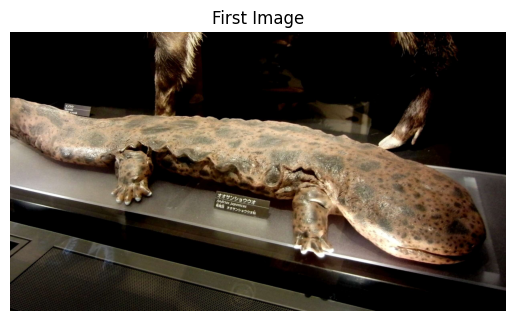

In [30]:
# Obtaining first image path 
first_image_path = f"../{IMAGE_DIR}/{df['file_path'][2]}"

show_image(first_image_path, 'First Image')

## Image resize pattern


2025-04-08 22:42:56.964101: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


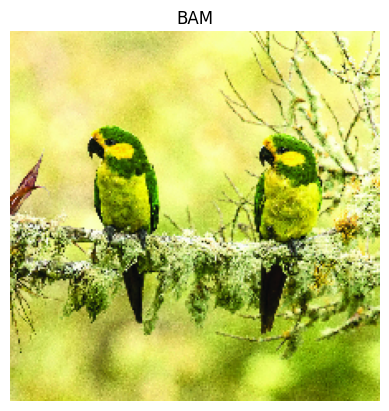

In [ ]:
model = 'VGG16'

resized_tensor = \
    keras.preprocessing.image.smart_resize(

        keras.utils.load_img(first_image_path)            
        ,IMAGE_SIZE_STANDARD[model]

        )
    
show_image(
    resized_tensor
    , 'BAM'    
)


## RGB centering pattern

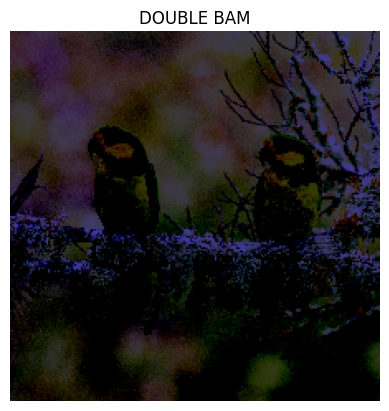

values of the center pixel: [188.9101  196.74846  86.8267 ]


In [5]:
center_values = tf.reduce_mean(
    resized_tensor
    , axis=(0, 1)
    )

centered_tensor = tf.clip_by_value(
    (resized_tensor - center_values)
    , 0, 255
    )

show_image(
    centered_tensor
    , 'DOUBLE BAM'
)

print(f"values of the center pixel: {center_values}")

### Image rotation pattern

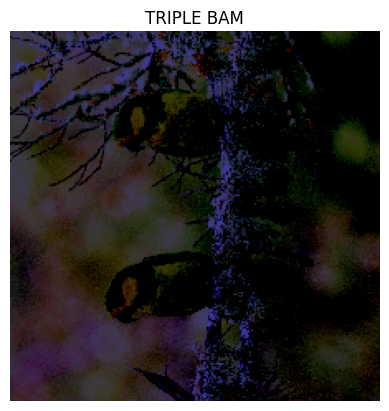

In [6]:
# rotate the image
rotated_tensor = tf.image.rot90(centered_tensor)

show_image(
    rotated_tensor
    , 'TRIPLE BAM'
)

## Toy pipeline

In [ ]:
# VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford
# in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”.
# The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.

model = 'VGG19'

# Load the VGG16 model
vgg = VGG19(
    include_top=True,
    weights='imagenet',
    input_shape=(*IMAGE_SIZE_STANDARD[model], 3)
)

# Print the model summary
vgg.summary()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Load and preprocess the image
image = keras.utils.load_img(first_image_path, target_size=IMAGE_SIZE_STANDARD[model])  # Resize image
image_array = keras.preprocessing.image.img_to_array(image)  # Convert to NumPy array
image_array = tf.expand_dims(image_array, axis=0)  

# Preprocess the image (VGG16-specific)
image_array = preprocess_input(image_array)

# Get the features
prediction = vgg.predict(image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


### To human readable format

In [32]:
# Decode the predictions
decoded_predictions = decode_predictions(prediction, top=20)[0]

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} (ID: {imagenet_id}) with probability: {score*100:.2f}%")

1: banded_gecko (ID: n01675722) with probability: 26.02%
2: axolotl (ID: n01632777) with probability: 25.38%
3: African_chameleon (ID: n01694178) with probability: 11.59%
4: frilled_lizard (ID: n01688243) with probability: 9.02%
5: common_newt (ID: n01630670) with probability: 6.11%
6: agama (ID: n01687978) with probability: 5.18%
7: triceratops (ID: n01704323) with probability: 3.07%
8: alligator_lizard (ID: n01689811) with probability: 2.35%
9: American_chameleon (ID: n01682714) with probability: 1.78%
10: platypus (ID: n01873310) with probability: 1.66%
11: common_iguana (ID: n01677366) with probability: 1.46%
12: Gila_monster (ID: n01692333) with probability: 1.29%
13: whiptail (ID: n01685808) with probability: 0.99%
14: American_alligator (ID: n01698640) with probability: 0.72%
15: European_fire_salamander (ID: n01629819) with probability: 0.54%
16: tailed_frog (ID: n01644900) with probability: 0.42%
17: Komodo_dragon (ID: n01695060) with probability: 0.39%
18: eft (ID: n01631663)